In [1]:
import ares
import matplotlib.pyplot as plt

### I try to compare `dTb`, `Tgas`, and `xe` for `initial_redshift = 60` or `1010`.

Firstly, we have to create the instances corresponding to different `initial_redshift`.

Attention: `dark_matter_heating = False` for both cases, so we are debugging the initial version of *ares*.

In [2]:
z60 = ares.simulations.Global21cm(
    initial_redshift=60, radiative_transfer=False, include_cgm=False, verbose=False, include_He=True)
z1010 = ares.simulations.Global21cm(
    initial_redshift=1010, radiative_transfer=False, include_cgm=False, verbose=False, include_He=True)

z60.run()
z1010.run()


## |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| ##
## WARNING: something wrong with solver.                                  ##
## |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| ##
## ---------------------------------------------------------------------- ##
## current dt  : -1.0000e+03                                              ##
## ---------------------------------------------------------------------- ##
## method      : -1000                                                    ##
## cell #      : 0                                                        ##
## redshift    : -1000                                                    ##
## ---------------------------------------------------------------------- ##
##                value     derivative                                    ##
## h_1         : 9.5153e-01  2.3537e-14                                   ##
## h_2         : 4.8473e-02 -2.3537e-14                                   #

capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


SystemExit: 1

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### The first plotted is `dTb`:
We can see that *ares* encounter two problems when `initial_redshift` is too high (e.g. 1010), whose default value is 60.

* `dTb` goes to positive for `initial_redshift = 1010` case
* `dTb` is not smooth for `initial_redshift = 1010` case

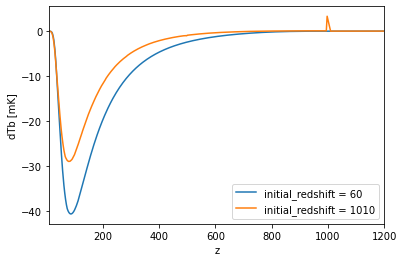

In [ ]:
# plt.plot(z60.history['z'], 2.73*(1+z60.history['z']), label='Tcmb')
plt.plot(z60.history['z'], z60.history['dTb'], label='initial_redshift = {}'.format(z60.pf['initial_redshift']))
plt.plot(z1010.history['z'], z1010.history['dTb'], label='initial_redshift = {}'.format(z1010.pf['initial_redshift']))
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("z")
plt.ylabel("dTb [mK]")
plt.xlim((10,1200))
# plt.ylim((1,10000))
plt.legend()
plt.show()

### Accoring to the definition of `dTb`, positive `dTb` indicates that `Tgas` is greater than `Tcmb`, which is indeed the case as is shown in the next figure:

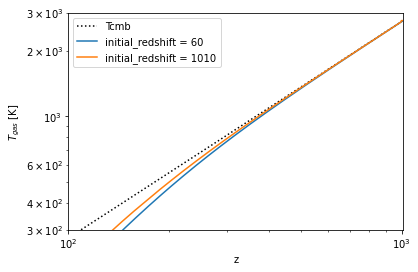

In [ ]:
plt.plot(z60.history['z'], 2.73*(1+z60.history['z']), label='Tcmb', color = 'k', linestyle=':')
plt.plot(z60.history['z'], z60.history['igm_Tk'], label='initial_redshift = {}'.format(z60.pf['initial_redshift']))
plt.plot(z1010.history['z'], z1010.history['igm_Tk'], label='initial_redshift = {}'.format(z1010.pf['initial_redshift']))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("$T_{gas}$ [K]")
plt.xlim((100,1010))
plt.ylim((300,3000))
plt.legend()
plt.show()

### However, the difference between `Tgas` of these two cases is not that big. The difference is big for `xe`:

Since *ares* directly uses the results from *CosmoRec* when `z > initial_redshift`, it's clear that the changing rate of `xe` in *ares* is pretty different with *CosmoRec* when `initial_redshift = 1010`.

This was why I doubted on the equation for `dqdt['e']` of *ares*.

/tmp/ipykernel_887/297377494.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim((0,0.1))


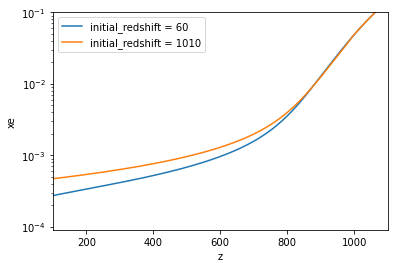

In [ ]:
# plt.plot(z60.history['z'], 2.73*(1+z60.history['z']), label='Tcmb', color = 'k', linestyle=':')
plt.plot(z60.history['z'], z60.history['igm_e'], label='initial_redshift = {}'.format(z60.pf['initial_redshift']))
plt.plot(z1010.history['z'], z1010.history['igm_e'], label='initial_redshift = {}'.format(z1010.pf['initial_redshift']))
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("xe")
plt.xlim((100,1100))
plt.ylim((0,0.1))
plt.legend()
plt.show()

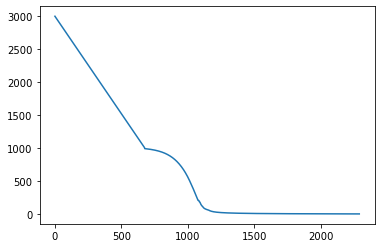

In [13]:
plt.plot(z1010.history['z'])

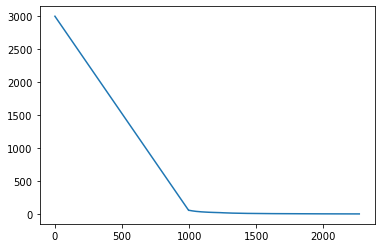

In [7]:
plt.plot(z60.history['z'])

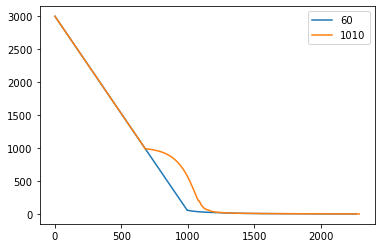

In [8]:
plt.plot(z60.history['z'], label='60')
plt.plot(z1010.history['z'], label='1010')
plt.legend()
plt.show()